# Distributions univariées et multivariées

## Résumé

Dans cette page, nous présentons les objets permettant d'utiliser des lois univariées et multivariées. Pour les lois univariées, nous montrons comment calculer la densité de probabilité, la fonction de répartition et les quantiles. Nous montrons également comment produire des graphiques.

[Pour voir ce Jupyter Notebook, nous conseillons NBViewer.](https://nbviewer.org/github/mbaudin47/otsupgalilee-eleve/blob/master/1-Intro-OT/Distributions.ipynb)

## Références

- http://openturns.github.io/openturns/master/user_manual/probabilistic_modelling.html

- https://en.wikipedia.org/wiki/Probabilistic_programming_language


## Lois univariées

OpenTURNS procède par programmation probabiliste : on peut créer une variable aléatoire et réaliser des manipulations sur ces variables, *sans* générer d'échantillon. 

Plusieurs distributions sont disponibles. Les plus courantes sont :

 - `Uniform`,
 - `Normal`,
 - `Beta`, 
 - `LogNormal`, 
 - `Exponential`, 
 - `Weibull`,
 
mais d'autres lois moins fréquentes sont aussi disponibles :

 - `ZipfMandelbrot`,
 - `Skellam`,
 - `Meixner`.

In [1]:
import openturns as ot
import math
import openturns.viewer as otv

## Loi univariée uniforme

Créons une variable uniforme : $\mathcal{U(2,5)}$.

In [2]:
u = ot.Uniform(2.0, 5.0)
u.setDescription(["A"])
u

class=Uniform name=Uniform dimension=1 a=2 b=5

La méthode `drawPDF()` permet de dessiner la densité de probabilité.

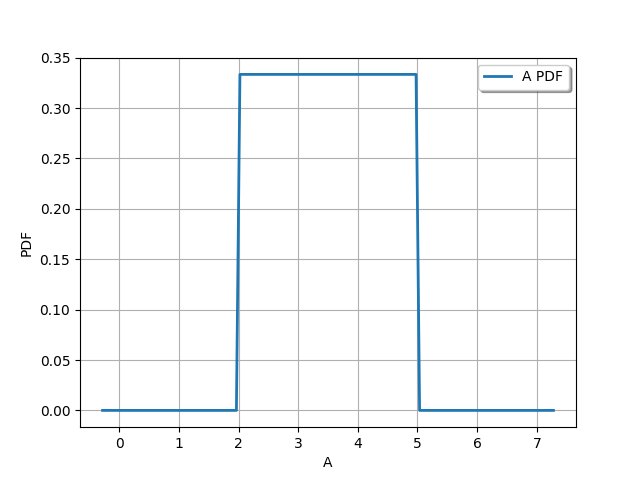

In [3]:
u.drawPDF()

La méthode `computePDF()` permet de calculer la densité de probabilité en un point donné. 

In [4]:
u.computePDF(3.5)

0.3333333333333333

La méthode `drawCDF()` permet de dessiner la fonction de répartition. 

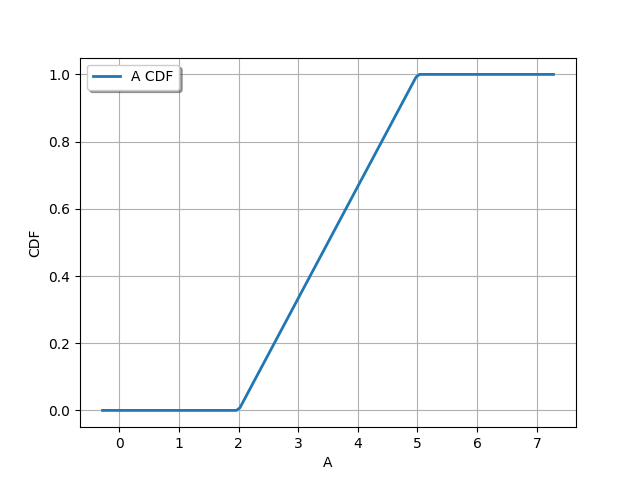

In [5]:
u.drawCDF()

La méthode `computeCDF()` calcule la valeur de la fonction de répartition en point.

In [6]:
u.computeCDF(3.5)

0.5

La méthode `getSample()` permet de générer un échantillon.

In [7]:
sample = u.getSample(10)
sample

,A
0,3.88963
1,4.648416
2,2.405829
3,2.097508
4,3.041171
5,4.908269
6,4.762039
7,3.50912
8,2.189618
9,2.878271


La manière la plus classique d'observer un échantillon consiste à dessiner l'histogramme empirique.

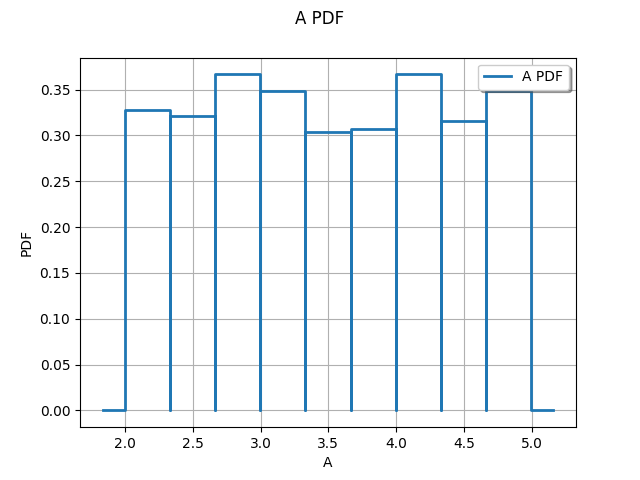

In [8]:
sample = u.getSample(1000)
ot.HistogramFactory().build(sample).drawPDF()

## Lois multivariées

Pour créer des lois multivariées, on peut utiliser deux méthodes :
- Certaines distributions sont multivariées par définition : `Normal`, `Dirichlet`, `Student`.
- On peut aussi définir une loi multivariée par combinaison :
    - d'une liste de lois marginales univariées,
    - d'une copule.

Dans le script suivant, nous définissons une loi multivariée en dimension 2 constituée de deux lois marginales gaussiennes et uniforme indépendantes.

In [9]:
n = ot.Normal()
n.setDescription(["N"])
u = ot.Uniform()
u.setDescription(["U"])
c = ot.IndependentCopula(2)
d = ot.JointDistribution([n, u], c)
d.getSample(10)

,N,U
0,1.259888,0.0830285
1,-2.151353,0.2123375
2,0.6383845,-0.3194695
3,1.198597,-0.3335571
4,0.5760515,-0.4738648
5,-2.721058,0.6944882
6,-0.4566343,0.7525542
7,0.8344516,-0.1990934
8,0.1897228,-0.4902139
9,-1.559897,-0.6660327


Pour visualiser un nuage de points bi-dimensionnel, on peut utiliser la classe `Cloud`.

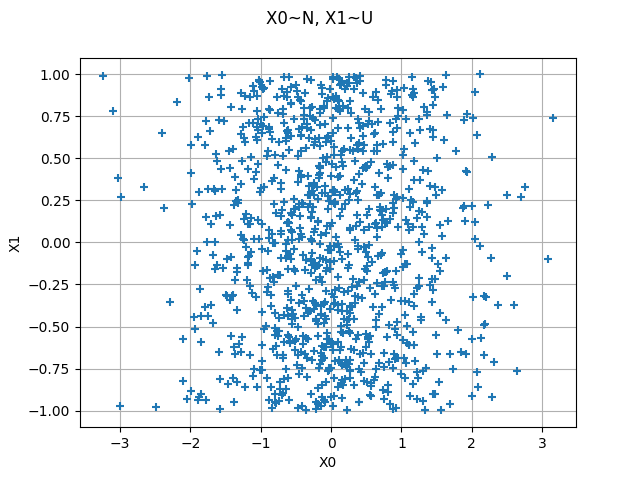

In [10]:
sample = d.getSample(1000)
showAxes = True
graph = ot.Graph("X0~N, X1~U", "X0", "X1", showAxes)
cloud = ot.Cloud(sample)  # Create the cloud
graph.add(cloud)  # Then, add it to the graph
graph

En fait, le second argument de la classe `JointDistribution` est optionnel : si il n'est pas présent, alors la copule est indépendante.

In [11]:
ot.JointDistribution([n, u])

Index,Variable,Distribution
0,N,"Normal(mu = 0, sigma = 1)"
1,U,"Uniform(a = -1, b = 1)"


La classe `NormalCopula` permet de créer une copule gaussienne. Une telle copule est paramétrée par sa matrice de corrélation. 

In [12]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.6
c = ot.NormalCopula(R)
c

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.6,0.6,1]

On peut dessiner les iso-valeurs d'une copule avec la méthode `drawPDF()`.

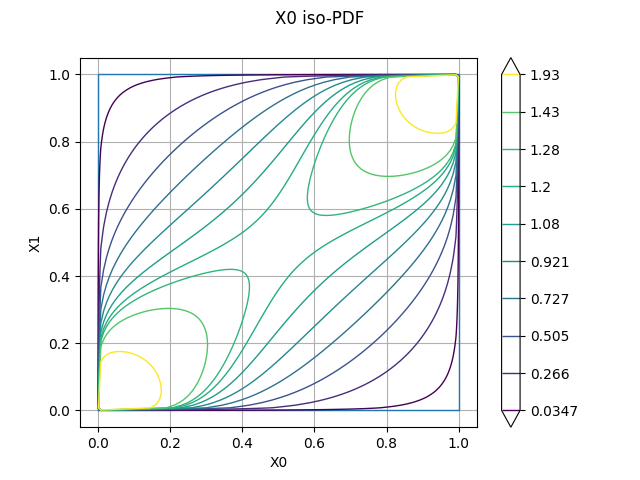

In [13]:
c.drawPDF()

## Troncature d'une loi

Pour certaines distributions non bornées, il peut être nécessaire de créer la distribution tronquée correspondante. Cela peut être nécessaire, par exemple, pour imposer une limite aux observations de la variable aléatoire. Pour cela, on peut utiliser la classe `TruncatedDistribution`. En effet, cette classe permet de tronquer toute distribution avec une borne inférieure, supérieure ou les deux.

**Remarque.** Il existe la distribution `TruncatedNormal` qui représente une loi normale tronquée. 

Le support de la loi log-normale est $[0, +\infty]$.

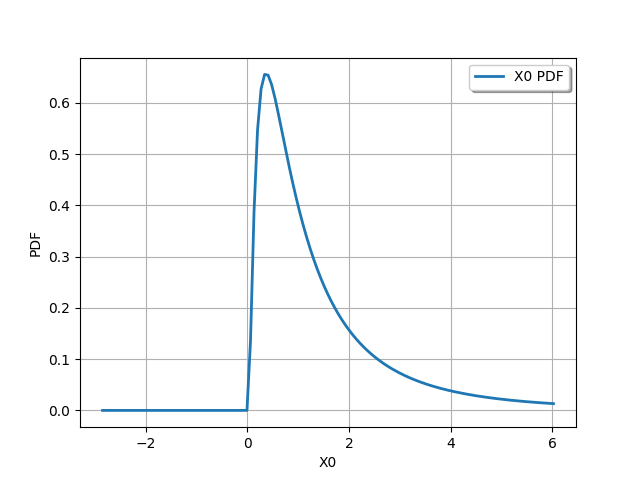

In [14]:
d = ot.LogNormal()
d.drawPDF()

On peut souhaiter imposer une borne supérieure, égale à 1.5.

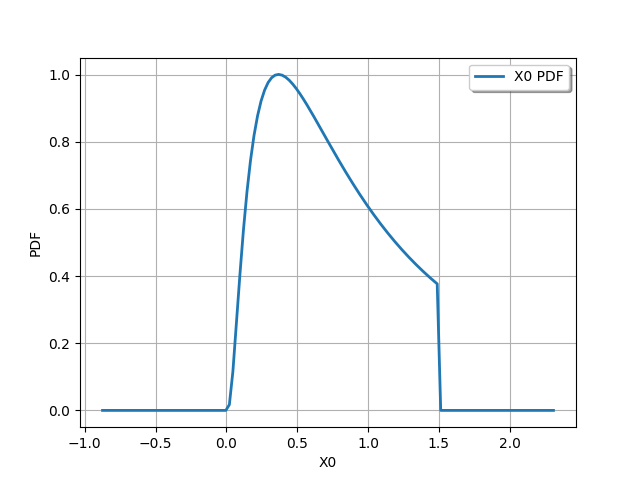

In [15]:
td = ot.TruncatedDistribution(d, 1.5, ot.TruncatedDistribution.UPPER)
td.drawPDF()

La loi tronquée est une distribution, ce qui implique que son intégrale est égale à 1. En conséquence, la valeur maximale de la densité de probabilité augmente un peu dans l'exemple précédent : on observe que la valeur maximale de la densité de probabilité est voisine de 1, alors qu'elle était voisine de 0.65 dans l'exemple précédent. Cette augmentation permet de compenser la perte de masse probabiliste correspondant aux observations supérieures ou égales à 1.5.

## Exercice 1 : loi Beta

- Créer une distribution `Beta` de paramètres suivants :
  - $\alpha=5$ : premier paramètre de forme, 
  - $\beta=2$ : second paramètre de forme, 
  - $a=9$ : borne inférieure, 
  - $b=10$ : borne supérieure.
- Dessiner la PDF et la CDF.
- Quelle méthode permet de savoir si cette distribution est continue ?

## Exercice 2 : loi exponentielle

- Créer une variable `Exponential` de moyenne $\lambda=3$.
- Dessiner la PDF et la CDF.
- Est-elle continue ?

## Exercice 3 : une variable de Bernoulli

- Créer une variable de Bernoulli telle que :

\begin{align*}
\mathbb{P}(X=1) & = 0.7, \\
\mathbb{P}(X=0) & = 0.3.
\end{align*}

En d'autres termes, créer une variable de Bernoulli de paramètre $p=0.7$.

- Dessiner la PDF.
- Quel est son support ?

## Exercice 4 : défaillance de disques

Les disques d'une certaine société sont défectueux avec une probabilité égale à 0.01. On fait l'hypothèse que les défaillances sont indépendances entre deux disques. La société vend les disques par lots de 10 et offre une garantie de remboursement si plus d'un disque est défectueux dans le lot. 

**Questions.**

- Quelle est la probabilité d'avoir un retour de lot ? 
- Si on achète trois lots, quelle est la probabilité que exactement un lot soit retourné ?


L'exercice est présenté dans (Ross, 2004), example 5.1a page 142.

**Référence**
- Sheldon Ross. _Introduction to probability and statistics_, 3d Ed., Elsevier, 2004

## Exercice 5 : pluviosité à Los Angeles

Les données du "National Oceanic and Atmospheric Administration" indiquent que le cumul de précipitations pour une année à Los Angeles suit une loi gaussienne de moyenne 12.08 pouces et d'écart-type 3.1 pouces. Dans cet exercice, on fait l'hypothèse que les cumuls de précipitations entre deux années sont indépendants.

**Questions.**

- Calculer la probabilité d'observer un cumul annuel supérieur à 15 pouces.
- Calculer la probabilité que le cumul de précipitations pendant deux ans soit supérieur à 25 pouces.
- Calculer la probabilité que la différence de cumul entre deux années soit supérieure à 3 pouces.


L'exercice est présenté dans (Ross, 2004), example 5.5d page 174.

**Référence**
- Sheldon Ross. _Introduction to probability and statistics_, 3d Ed., Elsevier, 2004

## Exercice 6 : taille des hommes

Références : 
- [1] Statistical Abstract of the United States U.S. Census Bureau. Table 209. Cumulative percent distribution
of population by height and sex : 2007-2008, 2012. https://www.census.gov/compendia/statab/2012/tables/12s0209.pdf
- [2] Mark F. Schilling, Ann E. Watkins, and William Watkins. Is human height bimodal ? The American
Statistician, American Statistical Association, 56(3) :223–229, 2002.

Le bureau de recensement des Etats-Unis fournit des statistiques sur ce pays. La table 209 dans [1] présente la distribution de la population par taille et par sexe. Bien que la question soit controversée [2], on pense que la distribution de la taille des hommes suit approximativement la loi Gaussienne. Soit X la taille d’un homme dont l’âge est entre 20 et 79 ans D’après les données dans [1], on peut
estimer que la moyenne et l’écart-type sont $\mu = 1.7633$ (m) et $\sigma = 0.0680$ (m).

**Questions.**

- Quelle est la probabilité que la taille d’un homme soit inférieure à 2 mètres ? Quelle est la probabilité d'avoir une taille supérieure à 2 mètres ?
- Quel est le quantile de niveau $p=0.99$ ? Quel est son sens physique ?

## Exercice 7 : une loi gaussienne bidimensionnelle 

- Construire une collection de marginales qui inclut deux lois normales $X_i \sim \mathcal{N}(0,1)$ pour $i \in \{1, 2\}$ ;
- Créer une `JointDistribution` en utilisant uniquement la collection précédente ;
- Créer une `JointDistribution` en utilisant la collection précédente et une structure de copule indépendante ;
- Créer une `JointDistribution` en utilisant la collection précédente et une structure de copule normale avec $\rho=0.6$ ;
- Obtenir un `Sample` de taille $1000$ ; le tracer.

## Annexe : dessiner plusieurs distributions dans un même graphique

In [16]:
myBeta = ot.Beta(5.0, 2.0, 9.0, 10.0)
myBeta.setDescription(["B"])
myPDFBeta = myBeta.drawPDF()
myCDFBeta = myBeta.drawCDF()
myExponential = ot.Exponential(3)
myExponential.setDescription(["E"])
myPDFExp = myExponential.drawPDF()
myCDFExp = myExponential.drawCDF()

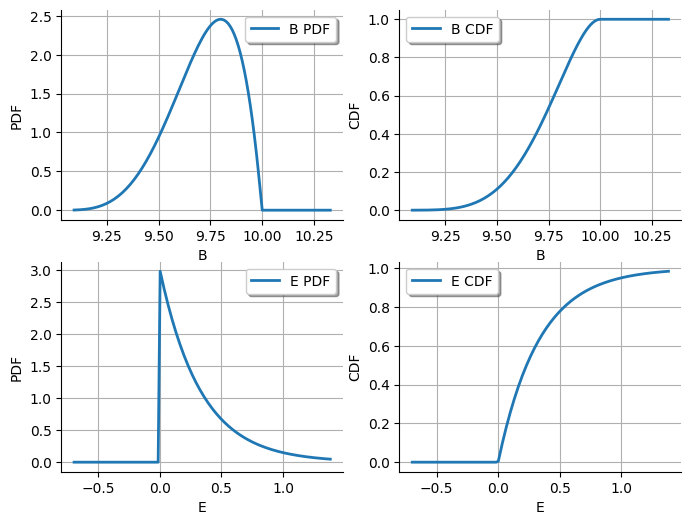

In [17]:
grid = ot.GridLayout(2, 2)
grid.setGraph(0, 0, myPDFBeta)
grid.setGraph(0, 1, myCDFBeta)
grid.setGraph(1, 0, myPDFExp)
grid.setGraph(1, 1, myCDFExp)
_ = otv.View(grid, figure_kw={"figsize": (8.0, 6.0)})

In [18]:
def createGridFromGraphList(listOfGraphs, numberOfRows=2, numberOfColumns=None):
    """
    Create a GridLayout with given number of rows and columns

    Parameters
    ----------
    listOfGraphs : list(ot.Graph)
        The graphs.
        The number of graphs must be lower or equal than the number of
        grid cells, i.e. numberOfRows x numberOfColumns.
    numberOfRows : int
        The number of rows in the grid.
    numberOfColumns : int
        The number of columns in the grid.

    Returns
    -------
    grid : ot.GridLayout(numberOfRows, numberOfColumns)
        The grid of graphs.
    """
    numberOfGraphs = len(listOfGraphs)
    if numberOfColumns is None:
        numberOfColumns = math.ceil(numberOfGraphs / numberOfRows)
    if numberOfGraphs > numberOfRows * numberOfColumns:
        raise ValueError(
            f"Number of graphs is {numberOfGraphs} "
            f"but nb. rows = {numberOfRows} and nb. columns = {numberOfColumns}"
        )
    grid = ot.GridLayout(numberOfRows, numberOfColumns)
    index = 0
    for i in range(numberOfRows):
        for j in range(numberOfColumns):
            if index >= numberOfGraphs:
                break
            grid.setGraph(i, j, listOfGraphs[index])
            index += 1
    return grid

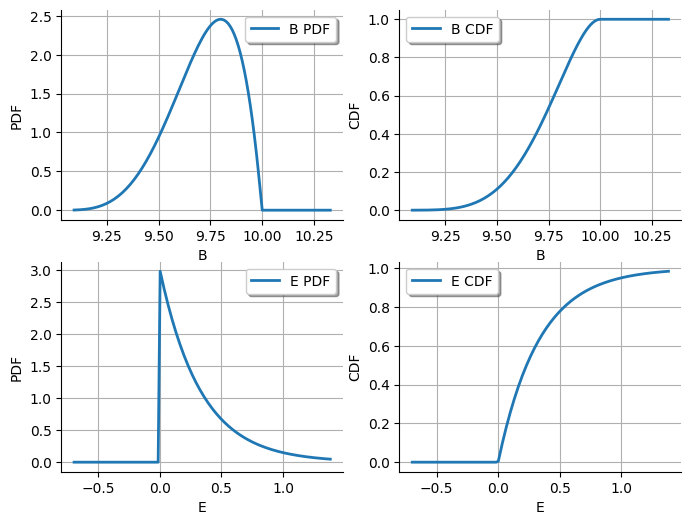

In [19]:
grid = createGridFromGraphList([myPDFBeta, myCDFBeta, myPDFExp, myCDFExp])
_ = otv.View(grid, figure_kw={"figsize": (8.0, 6.0)})